In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
retail_df = pd.read_csv('BigMartSalesData.csv')

In [5]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


In [7]:
#Plot total sales per month fortheYear 2011. 
#How havethe total sales increased over the months in the Year 2011? Which month has the lowest sales?
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541874 entries, 0 to 541873
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541874 non-null  object 
 1   StockCode    541874 non-null  object 
 2   Description  540422 non-null  object 
 3   Quantity     541874 non-null  int64  
 4   UnitPrice    541874 non-null  float64
 5   Amount       541874 non-null  float64
 6   InvoiceDate  541874 non-null  object 
 7   Day          541874 non-null  int64  
 8   Month        541874 non-null  int64  
 9   Year         541874 non-null  int64  
 10  CustomerID   406829 non-null  float64
 11  Country      541874 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 49.6+ MB


## Question 1

In [12]:
grouped_year = retail_df.query("Year == 2011").filter(
    ["Month", "Amount"]).groupby(["Month"], as_index=False).sum()

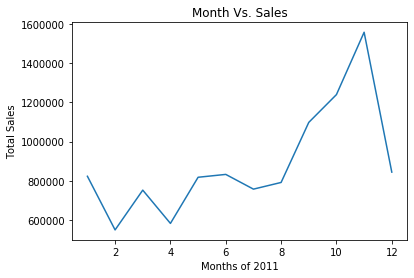

In [13]:
#Group for year 2011
x_axis = grouped_year['Month']
y_axis = grouped_year['Amount']
plt.plot(x_axis, y_axis)
plt.xlabel("Months of 2011")
plt.ylabel("Total Sales")
plt.title("Month Vs. Sales")
plt.show()

### Plot total sales per month for theYear 2011. 
### How havethe total sales increased over the months in the Year 2011? Which month has the lowest sales?
- Total Sales increased until November then Decreased.
- The Month with the Lowest Sales was February

## Question 2

- Plot as bar chart is the bar chart better to visualize than the simple plot?

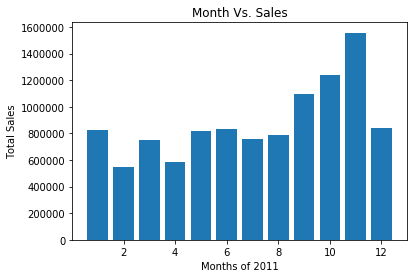

In [17]:
plt.bar(x_axis, y_axis)
plt.xlabel('Months of 2011')
plt.ylabel('Total Sales')
plt.title("Month Vs. Sales")
plt.show()

- Answer: The bar plot is easier to understand specific details for each months result

## Question 3
 - Plot a Pie Chart for the Year 2011 Country Wise. Which Country contributes highest towards sales?

In [18]:
grouped_country = retail_df.query("Year == 2011").filter(
    ["Country", "Amount"]).groupby(["Country"], as_index=False).sum()

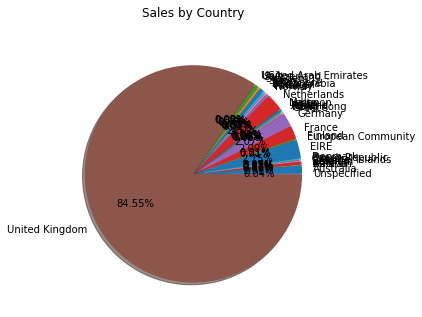

In [25]:
plt.figure(figsize=(5,5))
plt.pie(grouped_country["Amount"],
        labels=grouped_country["Country"],
        autopct='%1.2f%%',
        shadow=True)
plt.title('Sales by Country\n')
plt.show()

- Answer: The Country that contributes the most in sales is clearly the United Kingdom

## Question 4

- Plot Scatter Plot for the invoice amounts and see the concentration of amount.  
- In which range have most of the invoice amounts concentrated?


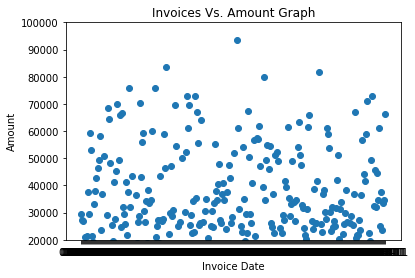

In [28]:
invoices = retail_df.filter(["InvoiceDate", "Amount"]).groupby(
    "InvoiceDate", as_index=False).sum()
plt.title('Invoices Vs. Amount Graph')
plt.xlabel('Invoice Date')
plt.ylabel('Amount')
plt.scatter(invoices["InvoiceDate"], invoices["Amount"])
plt.ylim(20000, 100000)
plt.show()

- Answer: From the graph, we can see that most of the amount is concentrated in the 20000 - 30000 range